In [88]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [89]:
df = pd.read_csv('data/test.csv')
#df_train = pd.read_csv('data/train.csv')

In [90]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
df_gender = pd.read_csv('data/gender_submission.csv')

In [92]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
#sns.pairplot(df)

#df_train.head()

In [94]:
#df_whole = pd.merge(df, df_train, on='PassengerId')

df_final= pd.merge(df, df_gender, on='PassengerId')

In [95]:
df_final

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [96]:
df_final.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [97]:
sex = pd.get_dummies(df_final['Sex'], drop_first=True).astype(int)
sex.head()



,male
0,1
1,0
2,1
3,1
4,0


In [98]:
data=pd.concat([df_final, sex], axis=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


<Axes: >

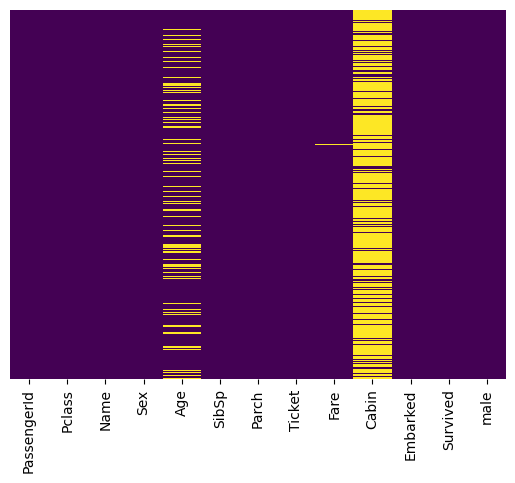

In [99]:
#Searching for null data as can't run a model with Null data
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

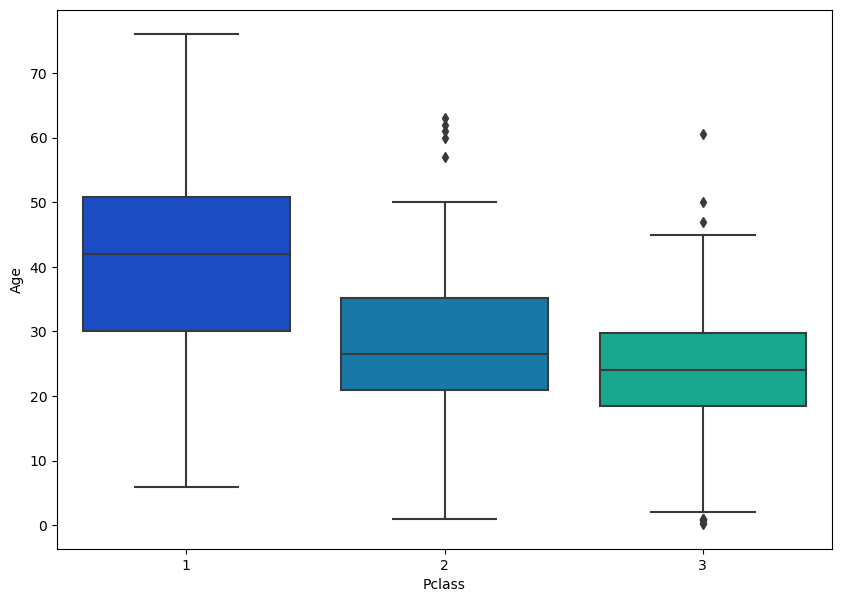

In [100]:
#could also calculate the exact mean (through a pivot) for each class but using a boxplot is quicker
plt.figure(figsize=(10,7))
sns.boxplot( data, x='Pclass', y='Age', palette='winter')

In [101]:
#function used to apply mean age to each user based on their passenger class


def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 43
        elif Pclass == 2:
            return 28
        elif Pclass == 3:
            return 24
    else:
        return Age

In [102]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis =1)

<Axes: >

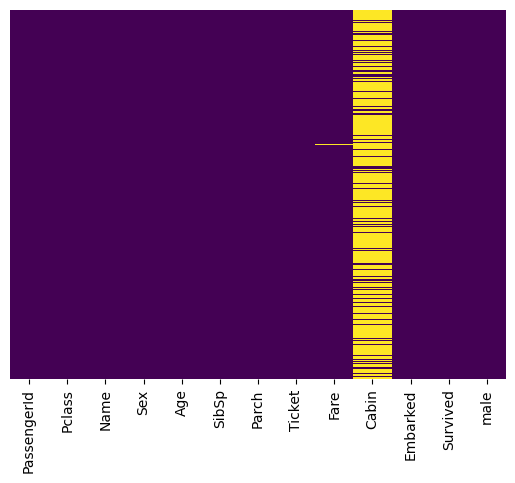

In [103]:
#Can see there are no more null values for age
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

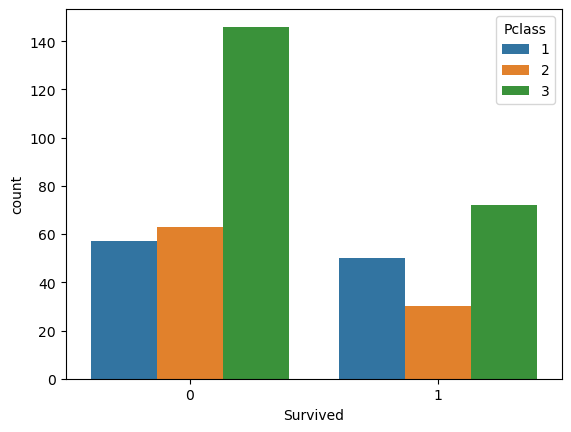

In [104]:
sns.countplot(data, x='Survived', hue= 'Pclass')

<Axes: xlabel='Age', ylabel='Count'>

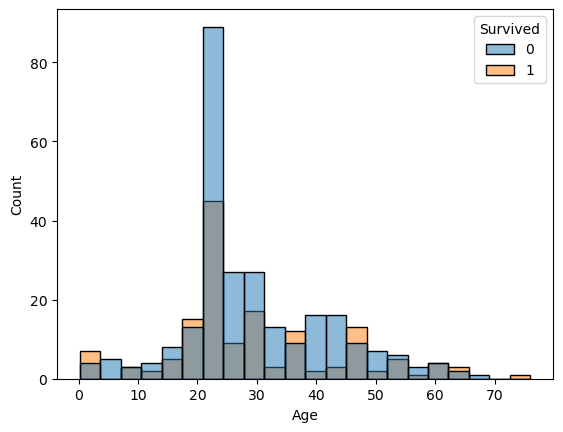

In [105]:
sns.histplot(data, x='Age', hue='Survived')

In [106]:
X = data[['male', 'Age','Pclass']]
y = data['Survived']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logistic_model = LogisticRegression()

In [111]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation

In [112]:
predictions = logistic_model.predict(X_test)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
print(confusion_matrix(y_test, predictions))

[[71  0]
 [ 0 55]]


In [115]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

